<h1>Introduction of Dataset</h1>

The given adult dataset is also known as “Census Income” dataset. An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, etc. The dataset contains 15 columns and 48842 rows.

<h1>Objective</h1>

The idea is to analyze the dataset and predict whether the income of an adult will exceeds 50k per year or not based on census data. 

In [1]:
# Import necessary packages
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Innomatics_July_Internship\\EDA+MoRe\\adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<h2><i>Data Exploration</i></h2>

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# replacing some column names to proper names for better understanding
df.rename(columns={'capital-gain':'capital gain', 'capital-loss':'capital loss', 'native-country':'native country',
                   'hours-per-week':'hours per week','marital-status':'marital status','educational-num':'educational num',
                  'fnlwgt':'final weight'},
          inplace=True)
df.columns

Index(['age', 'workclass', 'final weight', 'education', 'educational num',
       'marital status', 'occupation', 'relationship', 'race', 'gender',
       'capital gain', 'capital loss', 'hours per week', 'native country',
       'income'],
      dtype='object')

<h2><i>Data Cleaning</i></h2>

In [7]:
# checking the special characters in the dataset
df.isin(['?']).sum()

age                   0
workclass          2799
final weight          0
education             0
educational num       0
marital status        0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
native country      857
income                0
dtype: int64

In [8]:
# replacing the special character with NaN
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native country'] = df['native country'].replace('?', np.nan)

In [9]:
df.isin(['?']).sum()

age                0
workclass          0
final weight       0
education          0
educational num    0
marital status     0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
native country     0
income             0
dtype: int64

<h4>Observation</h4><ul><li>When we check for special character in dataset. We found some.<li>We convert the special character to null value.</ul>

In [10]:
# by checking null values we confirmed that all the special characters converted into NaN successfully
df.isnull().sum()

age                   0
workclass          2799
final weight          0
education             0
educational num       0
marital status        0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
native country      857
income                0
dtype: int64

In [11]:
# droping all the null or missing values
df.dropna(how='any', inplace=True)

In [12]:
df.isnull().sum()

age                0
workclass          0
final weight       0
education          0
educational num    0
marital status     0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
native country     0
income             0
dtype: int64

<h4>Observation</h4><ul><li>After converting the special character to null value. <li>We then remove it from the dataset.<li>And again after checking we found no null values and special character in the dataset.</ul>

In [13]:
# checking the duplicate values
df.duplicated().sum()

47

In [14]:
df= df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

<h4>Observation</h4><ul><li>Checking for duplicates we see some duplicate values and remove it from the dataset.</ul>

In [16]:
# checking descriptive statistics
df.describe()

,age,final weight,educational num,capital gain,capital loss,hours per week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<h4>Observation</h4><ul><li>Describe function display all the descriptive statistical values of the dataset features.</ul>

<h2><i>Univariate Analysis</i></h2>

<AxesSubplot:>

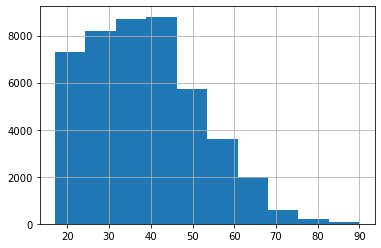

In [17]:
df['age'].hist()

<h4>Observation</h4><ul>As per above histogram
<li>This column has 25 % below age 28
<li>This column has 50 % below age 37
<li>This column has 75 % below age 47
<li>Most of the age values are between 17 to 50</ul>

In [18]:
# total number of people having age between 17 and 50
len(df[df['age'].between(17,50)])

36495

<AxesSubplot:>

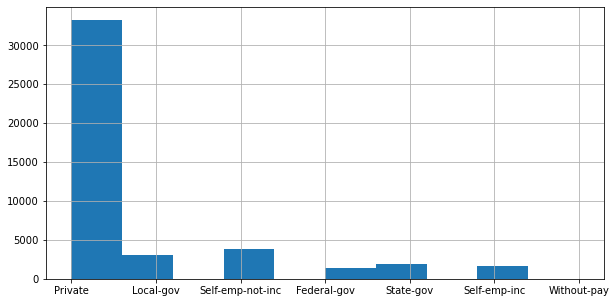

In [19]:
df['workclass'].hist(figsize=(10,5))

<h4>Observation</h4><ul><li>Most of the employees are from Private sector</ul>

In [20]:
# people having both bachelor and master degree
len(df[df['education'].isin(['Bachelors', 'Masters'])])

10072

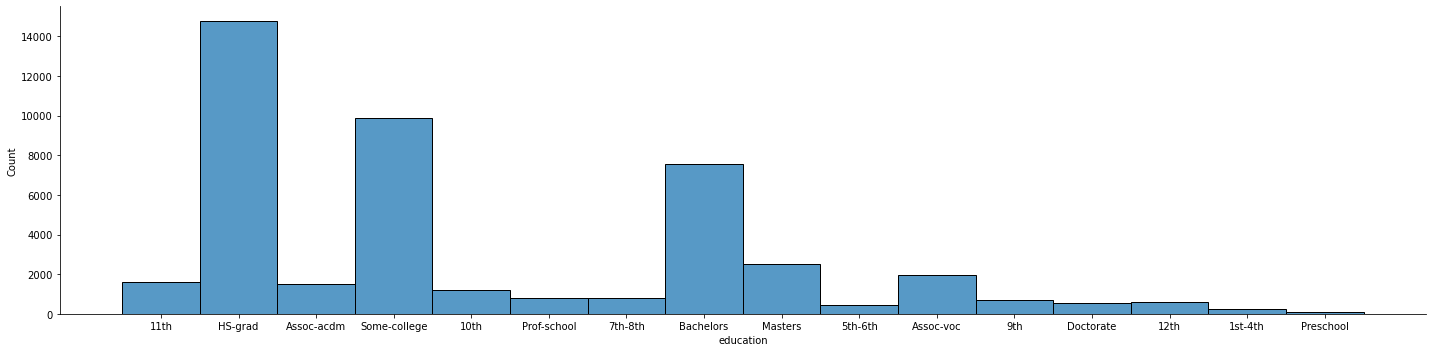

In [21]:
sns.displot(x=df['education'], aspect=4)

<h4>Observation</h4><ul><li>Most of the people are High School graduates.</ul>

<h2><i>Bivariate Analysis</i></h2>

<AxesSubplot:xlabel='income', ylabel='age'>

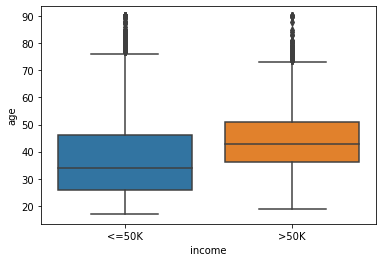

In [22]:
sns.boxplot(data=df, x='income', y='age')

<h4>Observation</h4><ul><li>Most of the people having income less than or equal to 50K are between age 25-45<li>Most of the people having income more than 50K are between age 37-50</ul>

<AxesSubplot:xlabel='income', ylabel='count'>

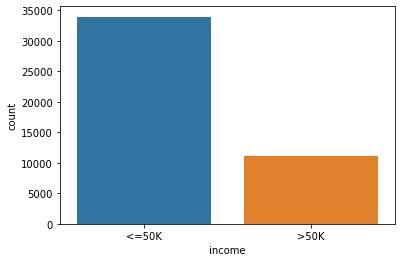

In [23]:
sns.countplot(data=df, x='income')

<h4>Observation</h4><ul><li>Most of the people having income less than or equal to 50K.</ul>

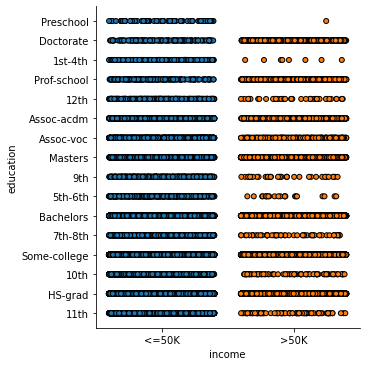

In [24]:
# plotting a bar graph for Education against Income to see the correlation between these columns 
sns.catplot(data=df, x='income', y='education', jitter=0.4,linewidth=1,edgecolor='black')

<h4>Observation</h4><ul><li>Most of the people having income less than or equal to 50K are from all the education levels.<li>Most of the people having income more than 50K are mostly done higher degrees. </ul>

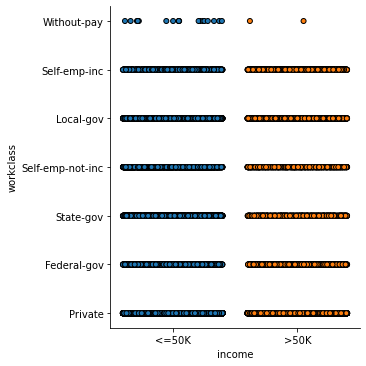

In [25]:
# plotting a bar graph for workclass against Income to see the correlation between these columns 
sns.catplot(data=df, x='income', y='workclass', jitter=0.4,linewidth=1,edgecolor='black')

<h4>Observation</h4><ul><li>Most of the people having income less than or equal to 50K having well workclass.<li>Most of the people having income more than 50K having excellent workclass. </ul>

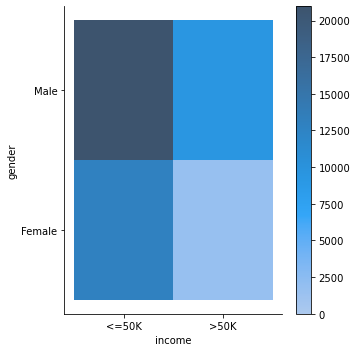

In [26]:
# plotting a bar graph for gender against Income to see the correlation between these columns 
sns.displot(data=df, x='income', y='gender', cbar=True)

<h4>Observation</h4><ul><li>Most of the people having income less than or equal to 50K are mostly male and some female.<li>Most of the people having income more than 50K are mostly male and some female. </ul>

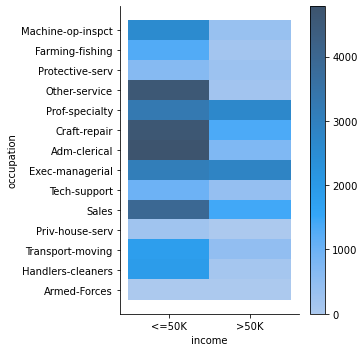

In [27]:
# plotting a bar graph for occupation against Income to see the correlation between these columns 
sns.displot(data=df, x='income', y='occupation',cbar=True)

<h4>Observation</h4><ul><li>Most of the people having income less than or equal to 50K are mostly from Adm-clerical and Other-service.<li>Most of the people having income more than 50K are mostly from Exec-managerial and Prof-specialty. </ul>

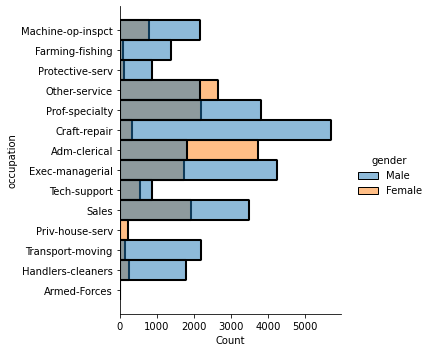

In [28]:
# plotting a bar graph for occupation for gender to see the correlation between these columns 
sns.displot(data=df, y='occupation', hue="gender")

<h4>Observation</h4><ul><li>Craft-repair are mostly males.<li>Adm-clerical are mostly females. </ul>

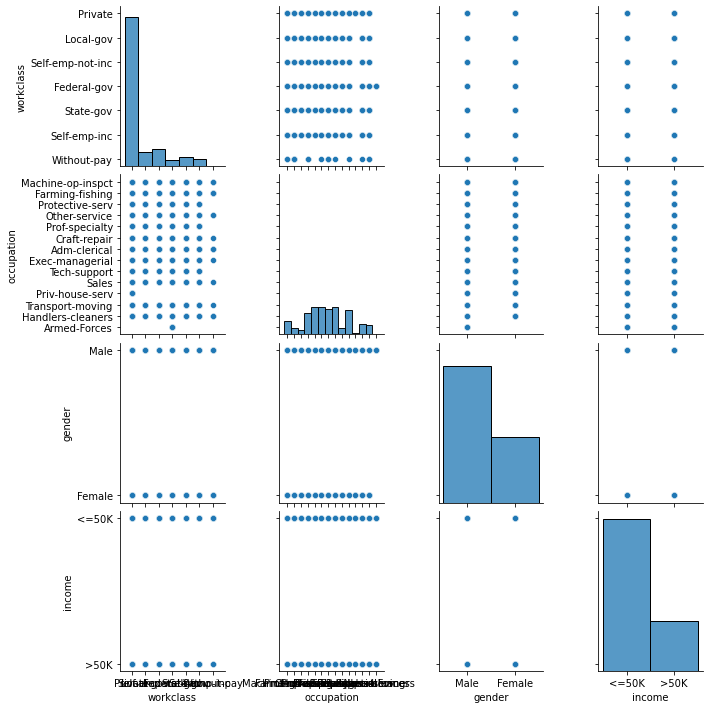

In [29]:
sns.pairplot(df, vars=['workclass','occupation','gender','income'])

<h2><i>Feature Engineering</i></h2>

In [30]:
# running a loop of value_counts of each column to find out unique values
for col in df.columns:
    print("**-- %s --**" % col)
    print(df[col].value_counts())
    print("\n")

**-- age --**
36    1283
33    1279
31    1273
35    1271
23    1237
      ... 
85       5
88       5
89       1
86       1
87       1
Name: age, Length: 74, dtype: int64


**-- workclass --**
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64


**-- final weight --**
203488    21
120277    18
125892    18
126569    17
113364    17
          ..
340043     1
337992     1
124818     1
167999     1
65584      1
Name: final weight, Length: 26741, dtype: int64


**-- education --**
HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name:

<h4>Observation</h4><ul><li>From above we see the unique values of all the features of dataset. </ul>

In [31]:
# dropping based on uniquness of data from the dataset 
df.drop(['educational num', 'hours per week', 'final weight', 'capital gain','capital loss', 'native country','age'], axis=1, inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
df

,workclass,education,marital status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,<=50K
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K


<h4>Observation</h4><ul><li>We drop some columns in order of the uniqueness of the data i.e., we drop the noisy columns. </ul>

In [33]:
#mapping the data into numerical data using map function
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
df

<ipython-input-33-ff4c0ced6891>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)


,workclass,education,marital status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0


<h2><i>Research Questions</i></h2>

<h4>Is there a relationship between occupation and gender? </h4>(i.e. does the preference of occupation depend on the gender)
<h4><span style="color:gray">Claiming that <b style="color:black">Occupation</b> and <b style="color:black">Gender</b> are dependent.</span></h4>

<h2>$ Null Hypothesis (H_0) : $ There is no relationship between two variables. </h2>

<h2>$ AlternateHypothesis (H_1) : $ There is a substantial relationship between variables.</h2>

In [34]:
from scipy.stats import chi2, chi2_contingency

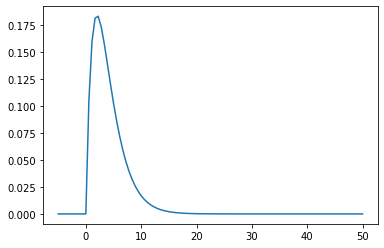

In [35]:
x = np.linspace(-5,50, 100)
y = chi2.pdf(x, df=4)
plt.plot(x, y)

In [36]:
df.gender.value_counts()

Male      30495
Female    14680
Name: gender, dtype: int64

In [37]:
df.occupation.value_counts()

Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: occupation, dtype: int64

In [38]:
# Looking at the freqency distribution

obs = pd.crosstab(df.occupation, df.gender)

In [39]:
obs

gender,Female,Male
occupation,,
Adm-clerical,3725,1810
Armed-Forces,0,14
Craft-repair,315,5695
Exec-managerial,1724,4256
Farming-fishing,95,1380
Handlers-cleaners,253,1792
Machine-op-inspct,792,2173
Other-service,2641,2164
Priv-house-serv,216,14


In [40]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(obs)

(8565.10300386568,
 0.0,
 13,
 array([[1798.6452684 , 3736.3547316 ],
        [   4.54941893,    9.45058107],
        [1953.0005534 , 4056.9994466 ],
        [1943.25179856, 4036.74820144],
        [ 479.31377975,  995.68622025],
        [ 664.54012175, 1380.45987825],
        [ 963.50193691, 2001.49806309],
        [1561.42556724, 3243.57443276],
        [  74.74045379,  155.25954621],
        [1950.07592695, 4050.92407305],
        [ 316.83453237,  658.16546763],
        [1756.40066408, 3648.59933592],
        [ 461.11610404,  957.88389596],
        [ 752.60387382, 1563.39612618]]))

In [41]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(obs)[0]
pval = chi2_contingency(obs)[1]
data = chi2_contingency(obs)[2]

In [42]:
confidence_level = 0.95

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, data)

chi2_critical

22.362032494826934

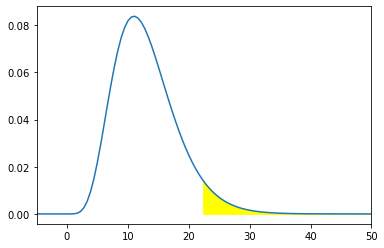

In [43]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = -5
x_max = 50

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, data)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, data)
plt.fill_between(x1, y1, color='yellow')

In [44]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [45]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


<h4>Observation</h4><ul><li>We can check the categorical variables dependency using chi-square test for hypothesis testing.<li>We see the unique values of both the features.<li>After performing chi-square test we found that the null hypothesis failed.<li>Hence, alternate hypothesis passed i.e.,both the variables are dependent on each other. </ul>

<h4>Is there a relationship between gender and income?</h4>

<h4 style="color:gray">Claiming here the relationship between <b style="color:black">Gender</b> and <b style="color:black">Income</b></h4>

In [46]:
df.gender.value_counts()

Male      30495
Female    14680
Name: gender, dtype: int64

In [47]:
df.income.value_counts()

0    33973
1    11202
Name: income, dtype: int64

In [48]:
# Looking at the freqency distribution

obs = pd.crosstab(df.gender, df.income)
obs

income,0,1
gender,,
Female,13011,1669
Male,20962,9533


In [49]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(obs)

(2101.5744045550996,
 0.0,
 1,
 array([[11039.81494189,  3640.18505811],
        [22933.18505811,  7561.81494189]]))

In [50]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(obs)[0]
pval = chi2_contingency(obs)[1]
data = chi2_contingency(obs)[2]

In [51]:
confidence_level = 0.95

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, data)

chi2_critical

3.841458820694124

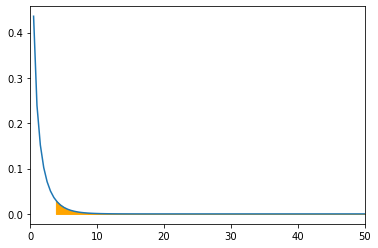

In [52]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 50

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, data)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, data)
plt.fill_between(x1, y1, color='orange')

In [53]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [54]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


<h4>Observation</h4><ul><li>We can check the categorical variables(gender and income)dependency using chi-square test for hypothesis testing.<li>We see the unique values of both the features.<li>After performing chi-square test we found that the null hypothesis failed.<li>Hence, alternate hypothesis passed i.e.,both the variables are dependent on each other. </ul>

<h1><i>Conclusion</i></h1>
<ul><li>Have to find the relationships between the columns on which we have to give conclusion.<li>Data cleaning is much needed.<li>We need to encode columns for further processes.<li>We get rid the dataset from special characters.<li>We also had dropped some noisy data columns.<li>Map target value which was in categorical to numerical binary. </ul>

<h2><i>Data Preparation</i></h2>

In [55]:
# Identifying the inputs (X) and output (y)

X = df[['workclass', 'education', 'marital status', 'occupation', 'relationship', 'race', 'gender']]
y = df['income']

In [56]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state= 0)

In [57]:
X_train

,workclass,education,marital status,occupation,relationship,race,gender
979,Self-emp-not-inc,Prof-school,Divorced,Prof-specialty,Unmarried,White,Male
7075,Private,Some-college,Never-married,Adm-clerical,Own-child,Black,Female
8468,Local-gov,Some-college,Widowed,Adm-clerical,Not-in-family,White,Female
35080,Private,Some-college,Never-married,Sales,Own-child,White,Female
24564,Private,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,Male
...,...,...,...,...,...,...,...
32871,Private,Assoc-acdm,Divorced,Adm-clerical,Not-in-family,Black,Male
23005,Self-emp-not-inc,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male
46059,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male
47094,Local-gov,Assoc-acdm,Never-married,Adm-clerical,Not-in-family,White,Female


In [58]:
y_train

979      1
7075     0
8468     0
35080    0
24564    1
        ..
32871    0
23005    0
46059    1
47094    0
2958     0
Name: income, Length: 33881, dtype: int32

In [59]:
X_test

,workclass,education,marital status,occupation,relationship,race,gender
32612,Federal-gov,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Black,Male
1697,Private,Assoc-voc,Widowed,Adm-clerical,Unmarried,White,Female
25071,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female
26364,Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male
13858,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female
...,...,...,...,...,...,...,...
48826,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female
302,Local-gov,Some-college,Divorced,Adm-clerical,Unmarried,White,Female
23045,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
2121,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male


In [60]:
y_test

32612    1
1697     0
25071    1
26364    0
13858    0
        ..
48826    1
302      0
23045    1
2121     1
40411    0
Name: income, Length: 11294, dtype: int32

In [61]:
X_train.dtypes

workclass         object
education         object
marital status    object
occupation        object
relationship      object
race              object
gender            object
dtype: object

In [62]:
# applying one hot encoding
X_train['workclass'].value_counts(normalize=True)

Private             0.736903
Self-emp-not-inc    0.083292
Local-gov           0.069360
State-gov           0.043151
Self-emp-inc        0.036245
Federal-gov         0.030548
Without-pay         0.000502
Name: workclass, dtype: float64

In [63]:
X_train['education'].value_counts(normalize=True)

HS-grad         0.328267
Some-college    0.219149
Bachelors       0.165609
Masters         0.054780
Assoc-voc       0.043948
11th            0.036451
Assoc-acdm      0.033795
10th            0.026564
7th-8th         0.018240
Prof-school     0.016824
9th             0.014580
12th            0.012869
Doctorate       0.012308
5th-6th         0.010035
1st-4th         0.005047
Preschool       0.001535
Name: education, dtype: float64

In [64]:
X_train['marital status'].value_counts(normalize=True)

Married-civ-spouse       0.468345
Never-married            0.321744
Divorced                 0.138455
Separated                0.030666
Widowed                  0.028157
Married-spouse-absent    0.011865
Married-AF-spouse        0.000767
Name: marital status, dtype: float64

In [65]:
X_train['occupation'].value_counts(normalize=True)

Prof-specialty       0.133497
Exec-managerial      0.132464
Craft-repair         0.132109
Adm-clerical         0.122606
Sales                0.120156
Other-service        0.107081
Machine-op-inspct    0.065346
Transport-moving     0.051976
Handlers-cleaners    0.044833
Farming-fishing      0.031906
Tech-support         0.030666
Protective-serv      0.021841
Priv-house-serv      0.005165
Armed-Forces         0.000354
Name: occupation, dtype: float64

In [66]:
X_train['relationship'].value_counts(normalize=True)

Husband           0.415690
Not-in-family     0.256693
Own-child         0.146070
Unmarried         0.105546
Wife              0.046457
Other-relative    0.029545
Name: relationship, dtype: float64

In [67]:
X_train['race'].value_counts(normalize=True)

White                 0.859361
Black                 0.093828
Asian-Pac-Islander    0.029102
Amer-Indian-Eskimo    0.009947
Other                 0.007762
Name: race, dtype: float64

In [68]:
X_train['gender'].value_counts(normalize=True)

Male      0.675659
Female    0.324341
Name: gender, dtype: float64

In [69]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [70]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',min_frequency= 3000, sparse=False)
X_train_ohe = pd.DataFrame(encoder.fit_transform(X_train), 
                               columns=encoder.get_feature_names_out(X_train.columns), 
                               index = X_train.index)

X_train_ohe

,workclass_infrequent_sklearn,education_HS-grad,education_Some-college,education_infrequent_sklearn,marital status_Married-civ-spouse,marital status_Never-married,marital status_infrequent_sklearn,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_infrequent_sklearn,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_infrequent_sklearn,race_White,race_infrequent_sklearn,gender_Male
979,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7075,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8468,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
35080,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
24564,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23005,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
46059,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
47094,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
encoder.categories_

[array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
        'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object),
 array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', '

In [72]:
X_train_cat = pd.DataFrame(index=X_train.index)
X_train_cat

""
979
7075
8468
35080
24564
...
32871
23005
46059
47094


In [73]:
X_test

,workclass,education,marital status,occupation,relationship,race,gender
32612,Federal-gov,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Black,Male
1697,Private,Assoc-voc,Widowed,Adm-clerical,Unmarried,White,Female
25071,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female
26364,Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male
13858,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female
...,...,...,...,...,...,...,...
48826,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female
302,Local-gov,Some-college,Divorced,Adm-clerical,Unmarried,White,Female
23045,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
2121,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male


In [74]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 32612 to 40411
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       11294 non-null  object
 1   education       11294 non-null  object
 2   marital status  11294 non-null  object
 3   occupation      11294 non-null  object
 4   relationship    11294 non-null  object
 5   race            11294 non-null  object
 6   gender          11294 non-null  object
dtypes: object(7)
memory usage: 705.9+ KB


In [75]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',min_frequency= 1000, sparse=False)
X_test_ohe = pd.DataFrame(encoder.fit_transform(X_test), 
                               columns=encoder.get_feature_names_out(X_test.columns), 
                               index = X_test.index)

X_test_ohe

,workclass_infrequent_sklearn,education_HS-grad,education_Some-college,education_infrequent_sklearn,marital status_Married-civ-spouse,marital status_Never-married,marital status_infrequent_sklearn,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_infrequent_sklearn,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_infrequent_sklearn,race_White,race_infrequent_sklearn,gender_Male
32612,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1697,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
25071,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
26364,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
13858,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
302,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
23045,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2121,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [76]:
encoder.categories_

[array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
        'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object),
 array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', '

In [77]:
X_test_cat = pd.DataFrame(index = X_test.index)
X_test_cat

""
32612
1697
25071
26364
13858
...
48826
302
23045
2121


In [78]:
print(X_train_ohe.shape, X_test_ohe.shape,y_train.shape,y_test.shape)

(33881, 20) (11294, 20) (33881,) (11294,)


<h2><i>Data Modelling and Evaluation</i></h2>

<h3 style="color:DarkSlateBlue">Logistic Regression</h3>

In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_ohe, y_train)

LogisticRegression(random_state=0)

In [80]:
y_pred = classifier.predict(X_test_ohe)

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [82]:
print('Logistic Regression:')
ac_sc_lr= round(accuracy_score(y_test, y_pred) * 100, 2)
f1_sc_lr= round(f1_score(y_test, y_pred) * 100, 2)
pr_sc_lr= round(precision_score(y_test, y_pred) * 100, 2)
print('Accuracy score:', ac_sc_lr)
print('F1 score:', f1_sc_lr)
print('Precision score:', pr_sc_lr)

Logistic Regression:
Accuracy score: 82.16
F1 score: 58.05
Precision score: 69.01


<h3 style="color:DarkSlateBlue">KNN Classifier</h3>

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [84]:
knn.fit(X_train_ohe, y_train)

KNeighborsClassifier()

In [85]:
y_pred_knn = knn.predict(X_test_ohe)

In [86]:
print('KNN Classifier:')
ac_sc_knn= round(accuracy_score(y_test, y_pred_knn) * 100, 2)
f1_sc_knn= round(f1_score(y_test, y_pred_knn) * 100, 2)
pr_sc_knn= round(precision_score(y_test, y_pred_knn) * 100, 2)
print('Accuracy score:', ac_sc_knn)
print('F1 score:', f1_sc_knn)
print('Precision score:', pr_sc_knn)

KNN Classifier:
Accuracy score: 80.46
F1 score: 56.08
Precision score: 62.85


<h3 style="color:DarkSlateBlue">Naive Bayes Classifier</h3>

In [87]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [88]:
nb.fit(X_train_ohe, y_train)

GaussianNB()

In [89]:
y_pred_nb = nb.predict(X_test_ohe)

In [90]:
print('Naive Bayes Classifier:')
ac_sc_nb= round(accuracy_score(y_test, y_pred_nb) * 100, 2)
f1_sc_nb= round(f1_score(y_test, y_pred_nb) * 100, 2)
pr_sc_nb= round(precision_score(y_test, y_pred_nb) * 100, 2)
print('Accuracy score:', ac_sc_nb)
print('F1 score:', f1_sc_nb)
print('Precision score:', pr_sc_nb)

Naive Bayes Classifier:
Accuracy score: 72.44
F1 score: 60.4
Precision score: 46.75


<h3 style="color:DarkSlateBlue">Support Vector Classifier</h3>

In [91]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [92]:
svc.fit(X_train_ohe, y_train)

SVC(random_state=42)

In [93]:
y_pred_svc = svc.predict(X_test_ohe)

In [94]:
print('Support Vector Classifier:')
ac_sc_svc= round(accuracy_score(y_test, y_pred_svc) * 100, 2)
f1_sc_svc= round(f1_score(y_test, y_pred_svc) * 100, 2)
pr_sc_svc= round(precision_score(y_test, y_pred_svc) * 100, 2)
print('Accuracy score:', ac_sc_svc)
print('F1 score:', f1_sc_svc)
print('Precision score:', pr_sc_svc)

Support Vector Classifier:
Accuracy score: 82.41
F1 score: 58.27
Precision score: 70.12


<h3 style="color:DarkSlateBlue">Decision Tree Classifier</h3>

In [95]:
from sklearn.tree import DecisionTreeClassifier
dc_tree = DecisionTreeClassifier(random_state=42)

In [96]:
dc_tree.fit(X_train_ohe, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
y_pred_dc_tree = dc_tree.predict(X_test_ohe)

In [98]:
print('Decision Tree Classifier:')
ac_sc_dt= round(accuracy_score(y_test, y_pred_dc_tree) * 100, 2)
f1_sc_dt= round(f1_score(y_test, y_pred_dc_tree) * 100, 2)
pr_sc_dt= round(precision_score(y_test, y_pred_dc_tree) * 100, 2)
print('Accuracy score:', ac_sc_dt )
print('F1 score:', f1_sc_dt)
print('Precision score:', pr_sc_dt)

Decision Tree Classifier:
Accuracy score: 81.94
F1 score: 57.99
Precision score: 67.92


<h3 style="color:DarkSlateBlue">Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [100]:
rf.fit(X_train_ohe, y_train)

RandomForestClassifier(random_state=42)

In [101]:
y_pred_rf = rf.predict(X_test_ohe)

In [102]:
print('Random Forest Classifier:')
ac_sc_rf= round(accuracy_score(y_test, y_pred_rf) * 100, 2)
f1_sc_rf= round(f1_score(y_test, y_pred_rf) * 100, 2)
pr_sc_rf= round(precision_score(y_test, y_pred_rf) * 100, 2)
print('Accuracy score:', ac_sc_rf)
print('F1 score:', f1_sc_rf)
print('Precision score:', pr_sc_rf)

Random Forest Classifier:
Accuracy score: 81.96
F1 score: 58.25
Precision score: 67.8


<h3 style="color:DarkSlateBlue">XGB Classifier</h3>

In [103]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [104]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [105]:
xgb.fit(X_train_ohe, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [106]:
y_pred_xgb = xgb.predict(X_test_ohe)

In [107]:
print('XGB Classifier:')
ac_sc_xgb= round(accuracy_score(y_test, y_pred_xgb) * 100, 2)
f1_sc_xgb= round(f1_score(y_test, y_pred_xgb) * 100, 2)
pr_sc_xgb= round(precision_score(y_test, y_pred_xgb) * 100, 2)
print('Accuracy score:',ac_sc_xgb )
print('F1 score:',f1_sc_xgb )
print('Precision score:',pr_sc_xgb )

XGB Classifier:
Accuracy score: 82.15
F1 score: 58.55
Precision score: 68.43


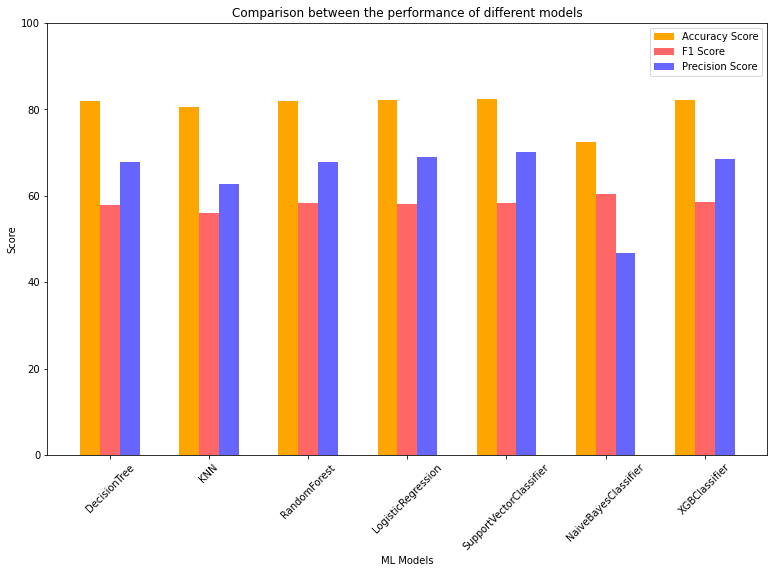

In [108]:
fig = plt.figure()
fig.set_size_inches(10,6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(0, 100)
plt.ylabel('Score')
plt.xlabel('ML Models')
plt.title("Comparison between the performance of different models")
label = ['DecisionTree', 'KNN', 'RandomForest','LogisticRegression', 'SupportVectorClassifier', 'NaiveBayesClassifier','XGBClassifier']
data = [[f1_sc_dt, f1_sc_knn, f1_sc_rf, f1_sc_lr, f1_sc_svc, f1_sc_nb, f1_sc_xgb],[ac_sc_dt, ac_sc_knn, ac_sc_rf, ac_sc_lr, ac_sc_svc, ac_sc_nb, ac_sc_xgb], [pr_sc_dt, pr_sc_knn, pr_sc_rf, pr_sc_lr, pr_sc_svc, pr_sc_nb, pr_sc_xgb]]
x = np.arange(len(label))
ax.bar(x -0.20,data[1],color='orange',width=0.2, label= 'Accuracy Score')
ax.bar(x ,data[0],color='red',width=0.2, alpha=0.6, label= 'F1 Score')
ax.bar(x +0.20,data[2],color='blue',width=0.2, alpha=0.6, label= 'Precision Score')
ax.set_xticks(x)
ax.set_xticklabels(label)
plt.xticks(rotation= 45)
plt.legend()
plt.show()

In [109]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [110]:
from prettytable import PrettyTable

columns = ["ML Models","Accuracy Score", "F1 Score", "Precision Score"]
myTable = PrettyTable()
myTable.add_column(columns[0], ['DecisionTree', 'KNN', 'RandomForest','LogisticRegression', 'SupportVectorClassifier', 'NaiveBayesClassifier','XGBClassifier'])
myTable.add_column(columns[1], [ac_sc_dt, ac_sc_knn, ac_sc_rf, ac_sc_lr, ac_sc_svc, ac_sc_nb, ac_sc_xgb])
myTable.add_column(columns[2], [f1_sc_dt, f1_sc_knn, f1_sc_rf, f1_sc_lr, f1_sc_svc, f1_sc_nb, f1_sc_xgb])
myTable.add_column(columns[3], [pr_sc_dt, pr_sc_knn, pr_sc_rf, pr_sc_lr, pr_sc_svc, pr_sc_nb, pr_sc_xgb])

print(myTable)


+-------------------------+----------------+----------+-----------+
|        ML Models        | Accuracy Score | F1 Score | Precision |
+-------------------------+----------------+----------+-----------+
|       DecisionTree      |     81.94      |  57.99   |   67.92   |
|           KNN           |     80.46      |  56.08   |   62.85   |
|       RandomForest      |     81.96      |  58.25   |    67.8   |
|    LogisticRegression   |     82.16      |  58.05   |   69.01   |
| SupportVectorClassifier |     82.41      |  58.27   |   70.12   |
|   NaiveBayesClassifier  |     72.44      |   60.4   |   46.75   |
|      XGBClassifier      |     82.15      |  58.55   |   68.43   |
+-------------------------+----------------+----------+-----------+


<h1><i>Conclusion</i></h1>
<ul><li>The optimized model’s Accuracy score , Precision and F1-score on testing data on Support Vector Classifier are 82.41%, 70.12% and 58.27% respectively.<li>To conclude the project, we can state that it is possible to determine whether a person makes over  a year based on census data, with a reasonable accuracy of 82.41% in the testing step.<li>There are features that are more relevant than others and should be better considered in order to increase the accuracy of the models.<li>We also need to focus on optimization of models' hyper parameters in order to extract the full potential of them.</ul>